# Learning Rate

## g(x):
$g(x) = x^4 - 4x^2 + 5$

In [1]:
def g(x):
    return (x**4) - (4 * x**2) + 5

## dg(x):
dg(x) = 4 * (x to the 4 - 1 power) - ( (4 * 2) * x to the (2 - 1) power) + 0
<br>$dg(x) = 4x^3 - 8x$

In [2]:
def dg(x):
    return (4 * x**3) - (8 * x)

## Gradient Descent Function:

In [3]:
################################
# Parameters:
################################
# 1. Derivative function
# 2. Initial guess value
# 3. Learning rate (multiplier)
# 4. Precision
################################
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        
        new_x = previous_x - (gradient * multiplier)
        step_size = abs(new_x - previous_x)
        
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            break;
        
    return new_x, x_list, slope_list

## Create Data:

In [4]:
import numpy as np
x_2 = np.linspace(-2, 2, 1000)

## Visualize Data:

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## Call Gradient Descent Function:

In [6]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                 multiplier=0.2, max_iter=500)

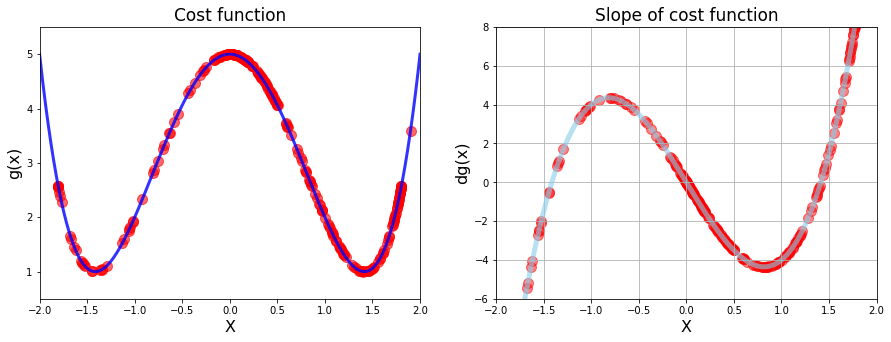

Number of steps: 254


In [7]:
##############################################
# Plot function, derivative and scatter plot side-by-side:
##############################################
plt.figure(figsize=[15, 5])

##############################################
# First Plot (left): Cost function
##############################################
plt.subplot(1, 2, 1)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

##############################################
# Second Plot (middle): Derivative
##############################################
plt.subplot(1, 2, 2,)

plt.title('Slope of cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)
plt.show()

print('Number of steps:', len(list_x))

## Run Gradient Descent Function 3 times:

In [8]:
nbr_of_times = 100

low_gamma = gradient_descent(
    derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, 
    max_iter=nbr_of_times)

mid_gamma = gradient_descent(
    derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, 
    max_iter=nbr_of_times)

high_gamma = gradient_descent(
    derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, 
    max_iter=nbr_of_times)

bad_gamma = gradient_descent(
    derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, 
    max_iter=nbr_of_times)

## Values for charts below:

In [9]:
index_for_new_x = 0 
index_for_x_list = 1 
index_for_slope_list = 2

# Y-axis: convert the list to a numpy array
low_values = np.array(low_gamma[index_for_x_list])
mid_values = np.array(mid_gamma[index_for_x_list])
high_values = np.array(high_gamma[index_for_x_list])

#X-axis:
iteration_list = list(range(0, nbr_of_times + 1))


## Plotting reduction in cost for each iteration:

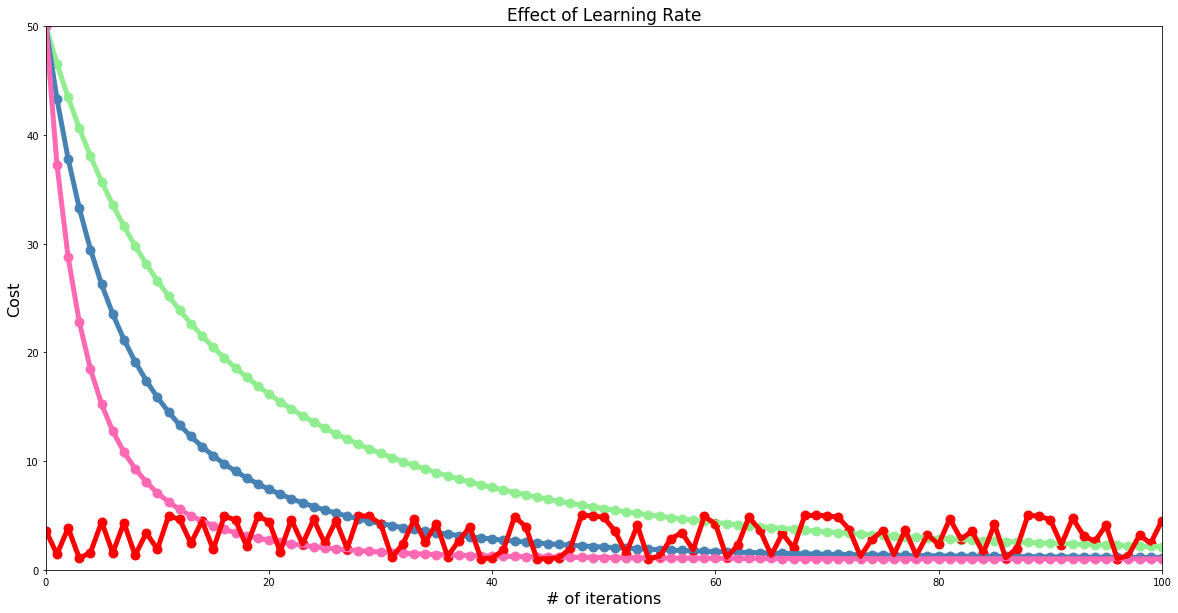

In [10]:
plt.figure(figsize=[20, 10])

plt.title('Effect of Learning Rate', fontsize=17)
plt.xlabel('# of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

plt.xlim(0, nbr_of_times)
plt.ylim(0, 50)

# Plotting low learing rate:
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

plt.plot(iteration_list, g(np.array(bad_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(bad_gamma[1])), color='red', s=80)

plt.show()